In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import kagglehub
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import os
import networkx as nx
import numpy as np
from scipy.linalg import eigvalsh

# Download latest version
path = kagglehub.dataset_download("gowrishankarp/newspaper-text-summarization-cnn-dailymail")

csv_path = os.path.join('archive/cnn_dailymail/train.csv')  
df = pd.read_csv(csv_path)
docs = df['highlights'].dropna().tolist()[:100] 

# Using BERT
model_bert = SentenceTransformer('all-MiniLM-L6-v2')
embeddings_bert = model_bert.encode(docs)

# Using TF-IDF
vectorizer = TfidfVectorizer()
embeddings_tfidf = vectorizer.fit_transform(docs).toarray()


sim_matrix_bert = cosine_similarity(embeddings_bert)
sim_matrix_tfidf = cosine_similarity(embeddings_tfidf)


def build_graph(sim_matrix, threshold=0.2):
    G = nx.Graph()
    n = sim_matrix.shape[0]
    for i in range(n):
        G.add_node(i)
        for j in range(i + 1, n):
            weight = sim_matrix[i, j]
            if weight >= threshold:
                G.add_edge(i, j, weight=weight)
    return G

G_bert = build_graph(sim_matrix_bert)
G_tfidf = build_graph(sim_matrix_tfidf)


print(nx.density(G_bert), nx.density(G_tfidf))
print(nx.average_clustering(G_bert), nx.average_clustering(G_tfidf))


ged = nx.graph_edit_distance(G_bert, G_tfidf)
print("Graph Edit Distance:", ged)


adj_bert = nx.to_numpy_array(G_bert)
adj_tfidf = nx.to_numpy_array(G_tfidf)

eigs_bert = eigvalsh(adj_bert)
eigs_tfidf = eigvalsh(adj_tfidf)

import matplotlib.pyplot as plt
plt.plot(eigs_bert, label='BERT')
plt.plot(eigs_tfidf, label='TF-IDF')
plt.legend()
plt.show()


/home/vasanth/Documents/python_projects/text_similarity/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
embeddings_bert[0]

array([-2.59476416e-02,  2.12512966e-02, -1.59503575e-02, -6.69942843e-03,
       -9.71502438e-03, -9.05604474e-03,  8.55830871e-03,  6.61959127e-02,
       -2.99726482e-02, -1.33548025e-02,  3.91114019e-02,  5.73224202e-02,
        1.69242872e-03,  8.64813626e-02, -1.30149871e-01,  3.97912338e-02,
       -4.87846211e-02,  4.18427624e-02, -6.22244691e-03,  5.08746281e-02,
       -6.41611591e-02,  7.43569583e-02, -1.16979545e-02, -7.74880424e-02,
       -3.19662094e-02,  8.72822180e-02, -5.88401454e-03, -3.28251533e-02,
        1.26110408e-02, -4.60645044e-03,  1.87733769e-02, -2.03917753e-02,
       -2.95739807e-02, -6.66690841e-02,  4.61323969e-02,  6.79038614e-02,
        7.88686052e-02, -5.27976733e-03,  6.76747561e-02,  9.64662358e-02,
        3.26005630e-02,  5.01489118e-02,  6.68293238e-02,  2.90247407e-02,
       -1.98342204e-02, -2.04540119e-02, -1.03660628e-01, -1.07820779e-02,
        3.55992243e-02, -2.18669213e-02,  4.88491356e-03, -1.77618070e-03,
        3.72483283e-02, -

In [ ]:
embeddings_tfidf.sum()

np.float64(1155.9669140490194)

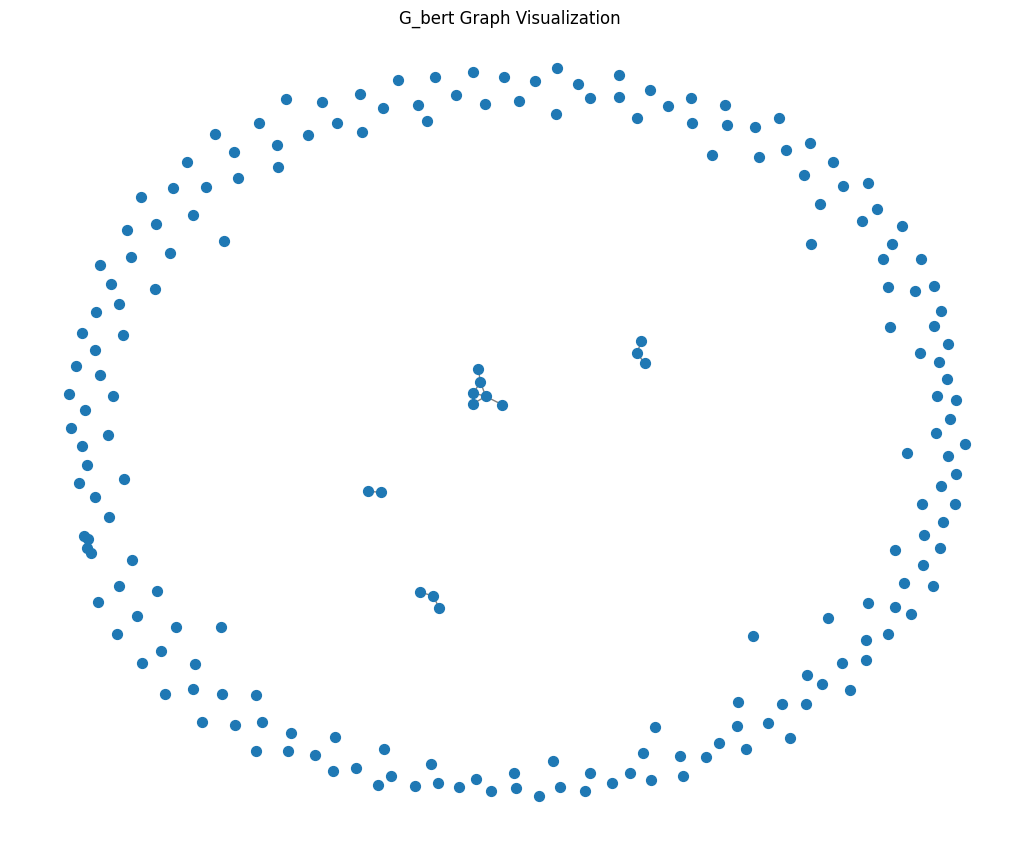

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_bert, seed=42)  # Layout for better visualization
nx.draw(G_bert, pos, node_size=50, with_labels=False, edge_color='gray')
plt.title("G_bert Graph Visualization")
plt.show()

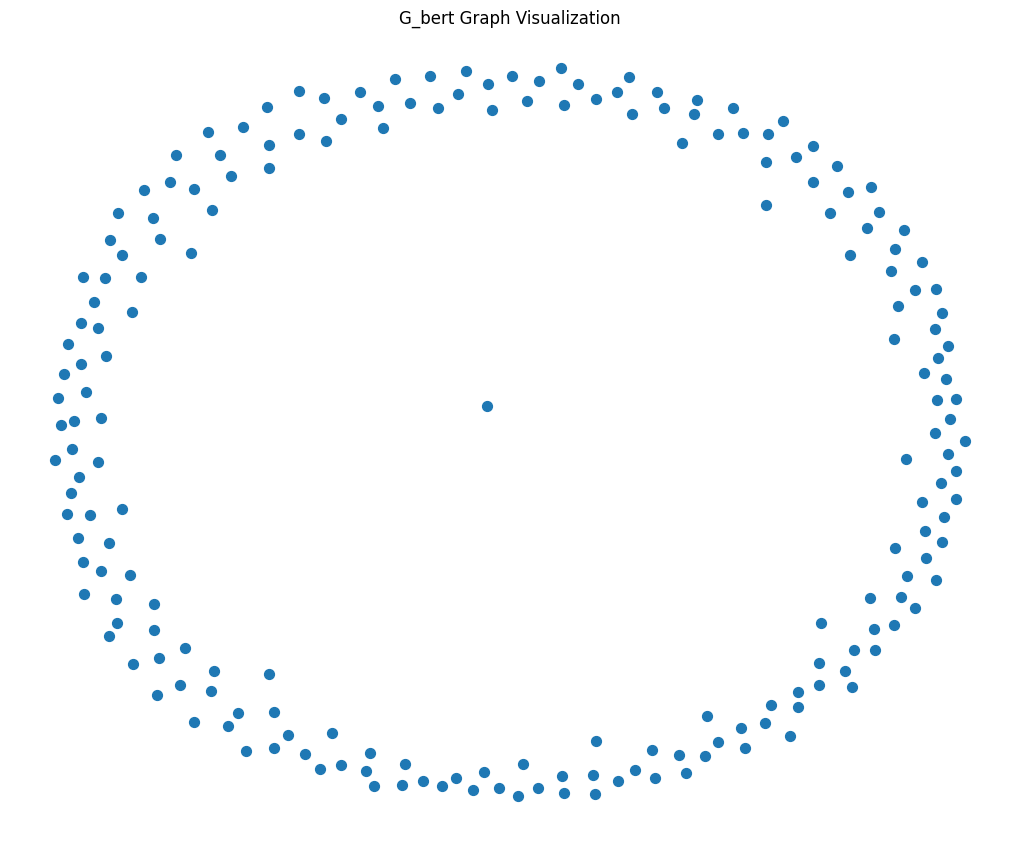

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_tfidf, seed=42)  # Layout for better visualization
nx.draw(G_tfidf, pos, node_size=50, with_labels=False, edge_color='gray')
plt.title("GG_tfidf_bert Graph Visualization")
plt.show()